# Titanic
[competition page](https://www.kaggle.com/competitions/titanic)  
[doc exploring data](https://docs.google.com/document/d/1CxpLS1uon8uKZvQU-rl4i_zCWKkHpHSf6Nn1Xuet_gU/edit)    


🎯Goal: Put Algo Spot check process in to practice

📚Reference:  
Machine Learning Mastery With Python by Jason Brownlee 

🕰️Time:  
- 2022/07/26 , Score: 0.77511

# 1. Prepare Problem

## a) Load libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

## b) Load dataset

In [35]:
raw_train = pd.read_csv('train.csv',index_col='PassengerId')
raw_test = pd.read_csv('test.csv',index_col='PassengerId')

# 2. Summarize Data

## a) Descriptive statistics  

In [36]:
# shape
raw_train.shape

(891, 11)

In [37]:
# types
raw_train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [ ]:
# head
raw_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# descriptions
print(raw_train.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [ ]:
# class distribution
print(raw_train.groupby('Survived').size())

Survived
0    549
1    342
dtype: int64


Idea:  
Since class distribution is quite even. And both classes are important.  
=> use accuracy as evaluation metric

In [ ]:
# null
raw_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
#unique for object cols
raw_train.select_dtypes(include=['object']).nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [ ]:
#unique for numerical cols
raw_train.select_dtypes(exclude=['object']).nunique()

Survived      2
Pclass        3
Age          88
SibSp         7
Parch         7
Fare        248
dtype: int64

In [ ]:
raw_train[['Name','Ticket','Cabin']]

,Name,Ticket,Cabin
PassengerId,,,
1,"Braund, Mr. Owen Harris",A/5 21171,NaN
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85
3,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123
5,"Allen, Mr. William Henry",373450,NaN
...,...,...,...
887,"Montvila, Rev. Juozas",211536,NaN
888,"Graham, Miss. Margaret Edith",112053,B42
889,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607,NaN


Idea:  
I should drop these three columns with too much unique values and null.

## b) Data visualizations 

### > Unimodal Data Visualizations

In [ ]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

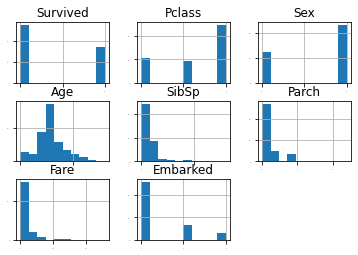

In [ ]:
train.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

Finding:  
- discrete distributions:         Survived, Pclass, Embarked, Sex
- Gaussian-like distributions :   Age
- exponential-like distributions: SibSp, Parch, Fare

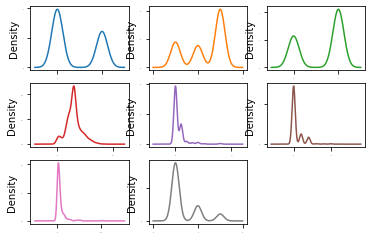

In [ ]:
# density
train.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=False,
fontsize=1)
pyplot.show()

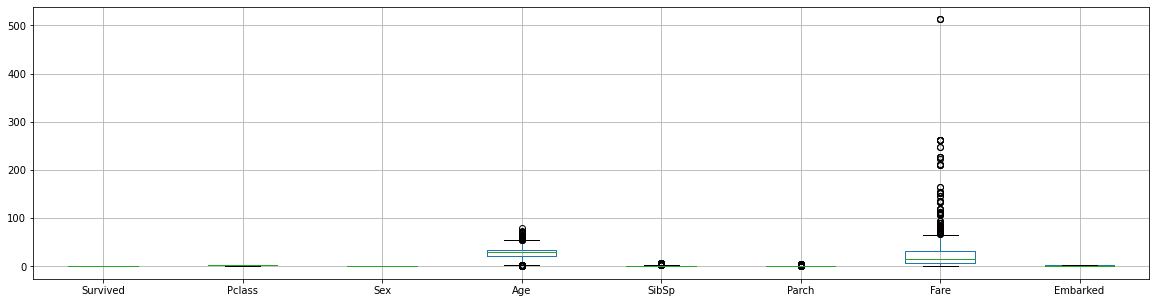

In [ ]:
# box and whisker plots
train.boxplot(figsize=(20,5))  
pyplot.show()

Finding:   
Age and fare have particular mean and spred.

### > Multimodal Data Visualizations

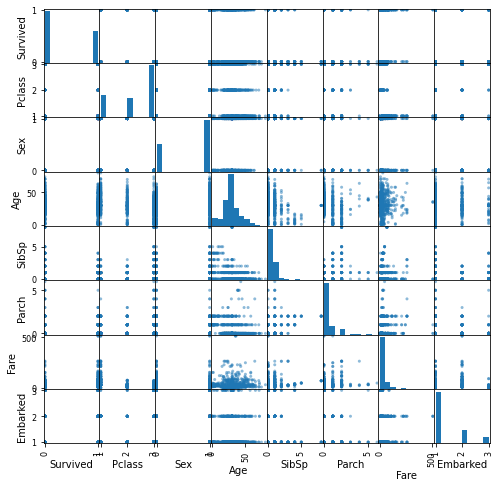

In [ ]:
# scatter plot matrix
scatter_matrix(train,figsize=(8,8))
pyplot.show()

It seems like the features have nocorrelation with others

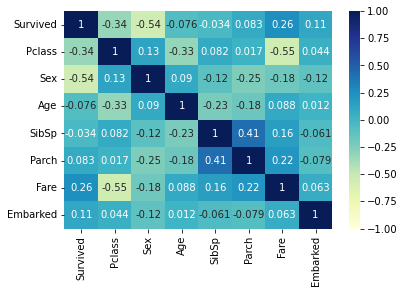

In [ ]:
ax = sns.heatmap(train.corr(),
                 vmin=-1, vmax=1,
                 annot=True,
                 cmap="YlGnBu")

It seems like sex survival has a high  correlation with sex and pclass.

Let's deep down to Sex

In [ ]:
train.groupby(['Sex','Survived']).count()

Pclass  Age  SibSp  Parch  Fare  Embarked
Sex Survived                                           
0   0             81   81     81     81    81        81
    1            231  231    231    231   231       231
1   0            468  468    468    468   468       468
    1            109  109    109    109   109       109

The survive rate for women is 0.74  
The survive rate for men 0.19  
Women are more likely to survive.

Let's deep down to Pclass

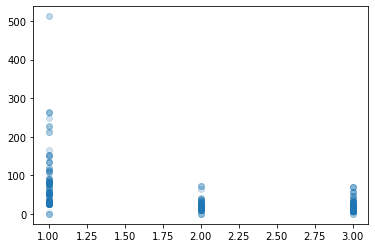

In [ ]:
plt.scatter(x='Pclass',y='Fare',data=train[['Fare','Pclass']],alpha=0.1)

Pclass1 is the most expensive class, but it have the lesser survivors.  
Maybe it's because there are more elder people.  
(accoring to the neg rate in matrix)

## b) Feature Selection  

## c) Data Transforms  

# 3. Prepare Data

## a) Data Cleaning  

In [ ]:
train = raw_train.copy()
test = raw_test.copy()

In [ ]:
#Encode Sex ['male', 'female']
train.Sex = train.Sex.map({'male':1,'female':0})
test.Sex = test.Sex.map({'male':1,'female':0})

In [ ]:
# fill null with mean
train.Age.fillna(round(train.Age.mean()),inplace = True)
test.Age.fillna(round(test.Age.mean()),inplace = True)
test.Fare.fillna(round(test.Fare.mean()),inplace = True)

In [ ]:
#drop the row without Embarked
train[train.Embarked.isnull()]
train.drop(index=[62,830],inplace=True)

In [ ]:
#Encode Embark['S', 'C', 'Q']
train.Embarked = train.Embarked.map({'S':1,'C':2,'Q':3})
test.Embarked = test.Embarked.map({'S':1,'C':2,'Q':3})

In [ ]:
#drop Cabin for too many empty values
#drop Ticket for too many unique values
#drop useless Name 
train.drop(columns=['Cabin','Ticket','Name'],inplace=True)
test.drop(columns=['Cabin','Ticket','Name'],inplace=True)

# 4. Evaluate Algorithms 

 ## a) Split-out validation dataset  

In [ ]:
# Split-out validation dataset
array = train.values
X = train.iloc[:,1:]
Y = train.iloc[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

## b) Test options and evaluation metric

In [ ]:
num_folds = 10
seed = 7
scoring = 'accuracy'

## c) Spot Check Algorithms 

### > Evaluate Algorithms: Baselin

- Linear Algorithms
    - Logistic Regression (LR)
    - Linear Discriminant Analysis (LDA).  
- Nonlinear Algorithms: 
    - Classification and Regression Trees (CART)
    - Support Vector Machines (SVM)
    - Gaussian Naive Bayes (NB)
    - k-Nearest Neighbors (KNN)

In [ ]:
models = []
#Linear
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
#NonLinear
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.793369 (0.039962)
LDA: 0.797516 (0.036517)
CART: 0.745481 (0.056212)
SVM: 0.683372 (0.065435)
NB: 0.794679 (0.034449)
KNN: 0.694875 (0.048609)


## d) Compare Algorithms

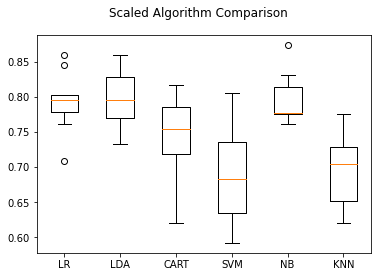

In [ ]:
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It is possible that the varied distribution of the attributes is having an effect on the accuracy of algorithms such as SVM and KNN.

### > Try scaling

In [ ]:
pipelines = []
#Linear
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
#NonLinear
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))

In [ ]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.796185 (0.039028)
ScaledLDA: 0.797516 (0.036517)
ScaledCART: 0.741295 (0.055550)
ScaledSVM: 0.812950 (0.037756)
ScaledNB: 0.794679 (0.034449)
ScaledKNN: 0.791901 (0.047566)


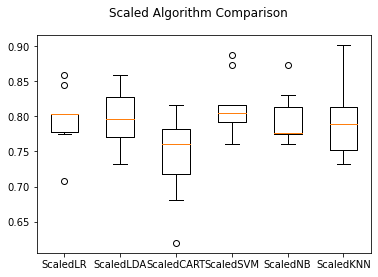

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Both SVM and KNN aregtreatly improve by Scaling.

# 5. Improve Accuracy  

## a) Algorithm Tuning  

### >Tuning KNN

I can start off by tuning the number of neighbors for KNN.  

The default number of neighbors is 7. 
Below we try all odd values of k from 1 to 21, covering the default value of 7. 

Each k value is evaluated using 10-fold cross validation on the training standardized dataset.

In [ ]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.804538 using {'n_neighbors': 7}


### >Tuning SVM

I can tune two key parameters of the SVM algorithm, the value of C (how much to relax the margin) and the type of kernel. 

The default for SVM (the SVC class) is to use the Radial Basis Function (RBF) kernel with a C value set to 1.0.

Like with KNN, we will perform a grid search using 10-fold cross validation with a standardized copy of the training dataset. 

 We will try a number of simpler kernel types and C values with less bias and more bias (less than and more than 1.0 respectively).

In [ ]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.818584 using {'C': 2.0, 'kernel': 'rbf'}


The accuracy 81.8% is seemingly better than what KNN could achieve

### >Tuning CART

Some important features to tune with original training set (without scaling)  
1. criterion: the function to measure the quality of a split ,default=”gini”  
2. max_depth, default=None  
3. min_samples_leaf, default=2  

In [ ]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 10, 20],
    'min_samples_leaf': [0.1, 0.5 , 1, 2, 3, 4, 5,10],
    'criterion': ["gini", "entropy"]
}

In [ ]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.820051 using {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}


This is the highest accuracy from now.

## b) Ensembles  

Another way that we can improve the performance of algorithms on this problem is by using ensemble methods.

 In this section we will evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods:

- Boosting Methods: 
    - AdaBoost (AB)  
    - Gradient Boosting (GBM)  
- Bagging Methods
    - Random Forests (RF)  
    - Extra Trees (ET).

In [ ]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.796127 (0.038522)
GBM: 0.806045 (0.049891)
RF: 0.793310 (0.061797)
ET: 0.775039 (0.056662)


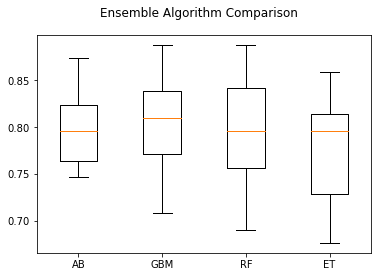

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see that both baggting techniques provide strong accuracy scores in the low 80s (%) with default configurations. 

# 6. Finalize Model  

In [ ]:
# prepare the model
model = DecisionTreeClassifier(criterion= 'gini', max_depth=3, min_samples_leaf=1)
model.fit(solution = clf.predict(sim_test), Y_train)
# estimate accuracy on validation dataset
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8258426966292135
[[97 12]
 [19 50]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       109
           1       0.81      0.72      0.76        69

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.83      0.82       178



In [ ]:
pred = model.predict(test)

In [ ]:
solution = pd.DataFrame({'PassengerId':test.index,
                           'Survived': pred})

In [ ]:
solution

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
solution.to_csv('submission2.csv',index=False)

In [ ]:
!kaggle competitions submit -c titanic -f submission2.csv -m "Message"

Successfully submitted to Titanic - Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|██████████| 3.18k/3.18k [00:07<00:00, 425B/s]


# 7. Opportunities for extensions
I would or could explore if you had another month or year to deep dive on the project.

1. More spot-check:  
    Models perform similarly after standardization, so I will put more time on tuning to find better model options to dig into.    
      
2. Test variations on Decision Tree Classifier:  
    Since Decision Tree Classifier perform well, so I will put more time tuning varants like Random forest and Boosted tree.  
      
3. Research under and overfitting:  
    I didn't do it this time.